In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [20]:
data = pd.read_csv("./data/Motor-Temperature-Dataset/measures_v2.csv")

data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


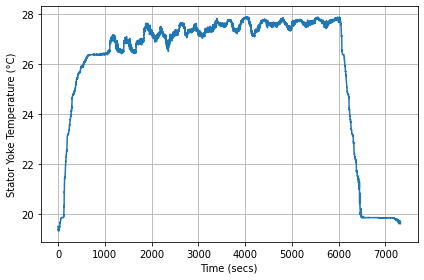

In [21]:
profile_id = 7

time = np.arange(0,len(data.motor_speed[data.profile_id==profile_id]) * 0.5, 0.5)

fig, ax = plt.subplots()
ax.plot(time, data.stator_yoke[data.profile_id==profile_id], '-')
ax.set_xlabel('Time (secs)')
ax.set_ylabel('Stator Yoke Temperature (\u00b0C)')

plt.grid()
plt.tight_layout()
plt.show()

y = 0.000243x + 26.507541


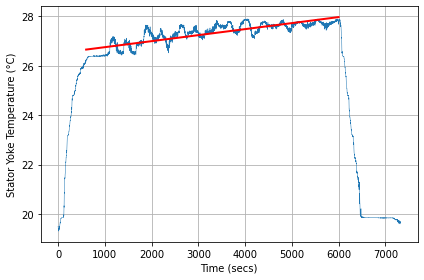

In [22]:
from scipy import stats

m, c, r_value, p_value, std_err = stats.linregress(time[(time > 600) & (time < 6000)],data.stator_yoke[(data.profile_id==profile_id)].iloc[(time > 600) & (time < 6000)])

x = time[(time > 600) & (time < 6000)]
y = m*x + c

print("y = %fx + %f" % (m,c))

fig, ax = plt.subplots()
ax.plot(time, data.stator_yoke[data.profile_id==profile_id], '-', linewidth=0.5)
ax.plot(x, y, 'r-', linewidth=2)
ax.set_xlabel('Time (secs)')
ax.set_ylabel('Stator Yoke Temperature (\u00b0C)')

plt.grid()
plt.tight_layout()
plt.show()

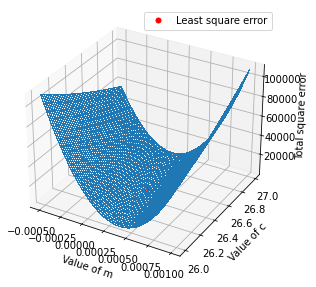

In [23]:
from matplotlib import cm

y_m = data.stator_yoke[(data.profile_id==profile_id)].iloc[(time > 600) & (time < 6000)]
x = time[(time > 600) & (time < 6000)]

error = list()
for m_ in np.arange(-0.0005, 0.001, 0.00001):
    for c_ in np.arange(26, 27, 0.01):
        y = m_ * x + c_
        error.append(np.sum(np.square(np.subtract(y, y_m))))

error = np.array(error).reshape((len(np.arange(-0.0005, 0.001, 0.00001)), len(np.arange(26, 27, 0.01))))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(np.arange(-0.0005, 0.001, 0.00001), np.arange(26, 27, 0.01))

ax.plot_wireframe(X, Y, error.T, cmap=cm.coolwarm, linewidth=0.01, antialiased=False)
ax.plot(m, c, np.sum(np.square(np.subtract(m * x + c, y_m))), 'ro', markersize=5, label="Least square error")

ax.set_xlabel("Value of m")
ax.set_ylabel("Value of c")
ax.set_zlabel("Total square error")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()